In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical ## specific  one I wanna use
from tensorflow.keras import utils
#from tensorflow.keras.layers import Input, Dense, Dropout  # Specific ones I wanna use, can just import whole module
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
import h5py
#import tables
import matplotlib.pyplot as plt
#import tensorflow as tf


In [2]:
x=1
y=2
x+y

import numpy as np
import pandas as pd 
import h5py
import tables
import matplotlib.pyplot as plt

In [3]:
a = np.arange(0,201, 5)
sum(a)

4100

## Import dataframes needed

In [4]:
input_file2 = "/scratch/ys20884/ml_vars/TTToSemiLeptonic/df_ml_inputs.hd5"

with h5py.File(input_file2, "r") as f:
    print("Contents of the file:")
    for key in f.keys():
        print(key)

df2 = pd.read_hdf(input_file2, key="df")
print("Dataframe columns:")
print(df2.columns)


input_file4 = "/scratch/ys20884/ml_vars/ttH125/df_ml_inputs.hd5"

with h5py.File(input_file4, "r") as f:
    print("Contents of the file:")
    for key in f.keys():
        print(key)

df4 = pd.read_hdf(input_file4, key="df")
#print("Dataframe columns:")
#print(df4.columns)
print(len(df2))
print(len(df4))



Contents of the file:
df
Dataframe columns:
Index(['dataset', 'entry', 'BiasedDPhi', 'DiJet_mass', 'HT',
       'InputMet_InputJet_mindPhi', 'InputMet_phi', 'InputMet_pt', 'MHT_phi',
       'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_phi', 'boostedObject_pt', 'boostedTop_area',
       'boostedTop_eta', 'boostedTop_mass', 'boostedTop_phi', 'boostedTop_pt',
       'boostedTop_tag', 'boostedV_area', 'boostedV_eta', 'boostedV_mass',
       'boostedV_phi', 'boostedV_pt', 'boostedV_tag', 'cleanedBJet_eta',
       'cleanedBJet_phi', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_phi',
       'cleanedJet_pt', 'hashed_filename', 'ncleanedBJet', 'ncleanedJet',
       'weight_nominal', 'xs_weight'],
      dtype='object')
Contents of the file:
df
651387
177858


In [5]:
input_file1 = "/scratch/ys20884/ml_vars/TTToHadronic/df_ml_inputs.hd5"

with h5py.File(input_file1, "r") as f:
    print("Contents of the file:")
    for key in f.keys():
        print(key)

df1 = pd.read_hdf(input_file1, key="df")
print("Dataframe columns:")
print(df1.columns)

input_file3 = "/scratch/ys20884/ml_vars/TTTo2L2Nu/df_ml_inputs.hd5"

with h5py.File(input_file3, "r") as f:
    print("Contents of the file:")
    for key in f.keys():
        print(key)

df3 = pd.read_hdf(input_file3, key="df")
print("Dataframe columns:")
print(df3.columns)


Contents of the file:
df
Dataframe columns:
Index(['dataset', 'entry', 'BiasedDPhi', 'DiJet_mass', 'HT',
       'InputMet_InputJet_mindPhi', 'InputMet_phi', 'InputMet_pt', 'MHT_phi',
       'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_phi', 'boostedObject_pt', 'boostedTop_area',
       'boostedTop_eta', 'boostedTop_mass', 'boostedTop_phi', 'boostedTop_pt',
       'boostedTop_tag', 'boostedV_area', 'boostedV_eta', 'boostedV_mass',
       'boostedV_phi', 'boostedV_pt', 'boostedV_tag', 'cleanedBJet_eta',
       'cleanedBJet_phi', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_phi',
       'cleanedJet_pt', 'hashed_filename', 'ncleanedBJet', 'ncleanedJet',
       'weight_nominal', 'xs_weight'],
      dtype='object')
Contents of the file:
df
Dataframe columns:
Index(['dataset',

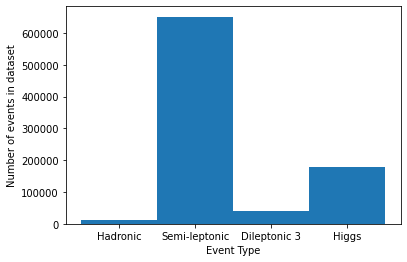

In [6]:
# calculate number of hits on each detector
hit_counts = [len(df1), len(df2), len(df3), len(df4)]

# histogram showing number of particles at each detector,  not worth making a function as use once
plt.hist(range(1,5), bins=4, range=[0.5,4.5], weights=hit_counts)
plt.xticks(range(1,5), ['Hadronic', 'Semi-leptonic', 'Dileptonic 3', 'Higgs'])
plt.xlabel('Event Type')
plt.ylabel('Number of events in dataset')
#plt.title('Number of Hits on Each Detector')
plt.show()

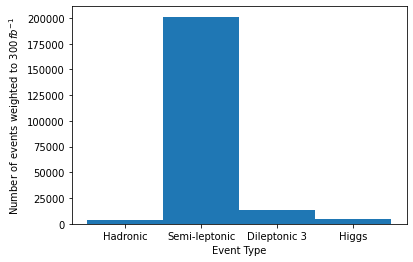

In [7]:
had_total = np.sum(df1['xs_weight']) * 300000
SL_total = np.sum(df2['xs_weight']) * 300000
dileptonic_total = np.sum(df3['xs_weight']) * 300000
Higgs_total = np.sum(df4['xs_weight']) * 300000


# calculate number of hits on each detector
hit_counts = [had_total, SL_total, dileptonic_total, Higgs_total]

# histogram showing number of particles at each detector,  not worth making a function as use once
plt.hist(range(1,5), bins=4, range=[0.5,4.5], weights=hit_counts)
plt.xticks(range(1,5), ['Hadronic', 'Semi-leptonic', 'Dileptonic 3', 'Higgs'])
plt.xlabel('Event Type')
plt.ylabel('Number of events weighted to $300\,fb^{-1}$')
#plt.title('Number of Hits on Each Detector')
plt.show()



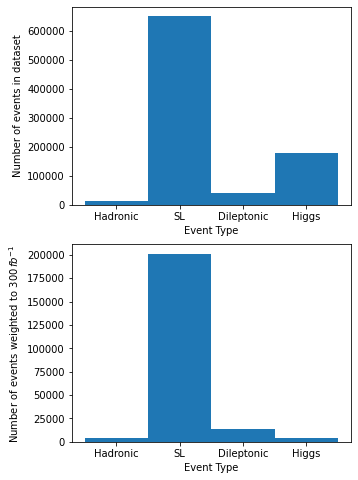

In [8]:
from matplotlib.ticker import ScalarFormatter


fig, axs = plt.subplots(2, 1, figsize=(5, 8)) # create 1 row and 2 columns of subplots

# subplot 2: unweighted events
hit_counts = [len(df1), len(df2), len(df3), len(df4)]

axs[0].hist(range(1,5), bins=4, range=[0.5,4.5], weights=hit_counts)
axs[0].set_xticks(range(1,5))
axs[0].set_xticklabels(['Hadronic', 'SL', 'Dileptonic', 'Higgs'])
axs[0].set_xlabel('Event Type')
axs[0].set_ylabel('Number of events in dataset')



# subplot 1: weighted events
had_total = np.sum(df1['xs_weight']) * 300000
SL_total = np.sum(df2['xs_weight']) * 300000
dileptonic_total = np.sum(df3['xs_weight']) * 300000
Higgs_total = np.sum(df4['xs_weight']) * 300000
hit_counts = [had_total, SL_total, dileptonic_total, Higgs_total]

axs[1].hist(range(1,5), bins=4, range=[0.5,4.5], weights=hit_counts)
axs[1].set_xticks(range(1,5))
axs[1].set_xticklabels(['Hadronic', 'SL', 'Dileptonic', 'Higgs'])
axs[1].set_xlabel('Event Type')
axs[1].set_ylabel('Number of events weighted to $300\,fb^{-1}$')

plt.subplots_adjust(wspace = 0.4)
plt.savefig('no_events.png', dpi=300, bbox_inches='tight')




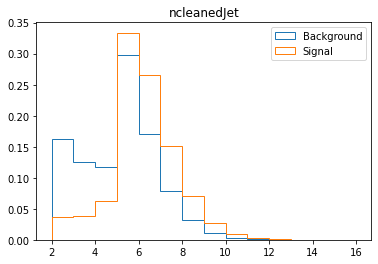

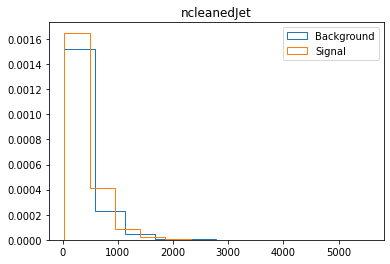

In [37]:
semi_ncleanedJet = df2['ncleanedJet']   #bins need manipulating (did already)
signal_ncleanedJet = df4['ncleanedJet']
plt.hist(x=semi_ncleanedJet, bins = int(np.max(df2['ncleanedJet']) - np.min(df2['ncleanedJet'])), weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_ncleanedJet, bins = int(np.max(df4['ncleanedJet']) - np.min(df4['ncleanedJet'])), weights = df4.xs_weight, density = True, histtype = 'step' , label = 'Signal')
plt.title('ncleanedJet')
plt.legend()
plt.show() 

DiJet_mass = df2['DiJet_mass']   #bins need manipulating (did already)
DiJet_mass2 = df4['DiJet_mass']
plt.hist(x=DiJet_mass,  bins=10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=DiJet_mass2, bins = 10,density = True, histtype = 'step' , label = 'Signal')
#plt.title('ncleanedJet')
plt.legend()
plt.show() 


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 - ncleanedJet
semi_ncleanedJet = df2['ncleanedJet']
signal_ncleanedJet = df4['ncleanedJet']
axs[0].hist(x=semi_ncleanedJet, bins=int(np.max(df2['ncleanedJet']) - np.min(df2['ncleanedJet'])), 
            density=True, histtype='step', label='Background')
axs[0].hist(x=signal_ncleanedJet, bins=int(np.max(df4['ncleanedJet']) - np.min(df4['ncleanedJet'])), 
            density=True, histtype='step' , label='Signal')
axs[0].set_title('ncleanedJet')
axs[0].legend()

# Plot 2 - DiJet_mass
bins = np.linspace(0,4000,15)
DiJet_mass_bg =  pd.concat([df1['DiJet_mass'], df2['DiJet_mass'], df3['DiJet_mass']])

axs[1].hist(x=DiJet_mass_bg, bins=bins, density=True, histtype='step', label='Background')
axs[1].hist(x=df4['DiJet_mass'], bins=bins, density=True, histtype='step', label='Signal')
axs[1].set_title('DiJet_mass')
axs[1].set_xlim(0,3000)
axs[1].legend()



plt.subplots_adjust(wspace = 0.4)
plt.show()


In [ ]:
bins = np.linspace(0,5000,11)
bins

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

cleaned_jet_bg = pd.concat([df1['ncleanedJet'], df2['ncleanedJet'], df3['ncleanedJet']])

axs[0, 0].hist(x=cleaned_jet_bg, bins=int(np.max(df2['ncleanedJet']) - np.min(df2['ncleanedJet'])),
               density=True, histtype='step', label='Background')
axs[0, 0].hist(x=df4['ncleanedJet'], bins=int(np.max(df4['ncleanedJet']) - np.min(df4['ncleanedJet'])),
               density=True, histtype='step', label='Signal')
axs[0, 0].set_title('ncleanedJet')
axs[0, 0].legend()


bins = np.linspace(0,4000,15)
DiJet_mass_bg =  pd.concat([df1['DiJet_mass'], df2['DiJet_mass'], df3['DiJet_mass']])

axs[0, 1].hist(x=DiJet_mass_bg, bins=bins, density=True, histtype='step', label='Background')
axs[0, 1].hist(x=df4['DiJet_mass'], bins=bins, density=True, histtype='step', label='Signal')
axs[0, 1].set_title('DiJet_mass')
axs[0, 1].set_xlim(0,3000)
axs[0, 1].legend()


MHT_pt_bg = pd.concat([df1['MHT_pt'], df2['MHT_pt'], df3['MHT_pt']])

axs[1, 0].hist(x=df2['MHT_pt'], bins=100, density=True, histtype='step', label='Background')
axs[1, 0].hist(x=df4['MHT_pt'], bins = 100, density=True, histtype='step', label='Signal')
axs[1, 0].set_title('MHT_pt')
axs[1, 0].set_xlim(100,700)
#axs[1, 0].set_yscale('log')
axs[1, 0].legend()


semi_cleanedJet_phi = df2['cleanedJet_phi']
semi_cleanedJet_phi_lst=[]
for i in semi_cleanedJet_phi:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_phi_lst.append(j)
signal_cleanedJet_phi = df4['cleanedJet_phi']
signal_cleanedJet_phi_lst=[]
for i in signal_cleanedJet_phi:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_phi_lst.append(j)

axs[1, 1].hist(x=semi_cleanedJet_phi_lst, bins=10, density=True, histtype='step', label='Background')
axs[1, 1].hist(x=signal_cleanedJet_phi_lst, bins=10, density=True, histtype='step', label='Signal')
axs[1, 1].set_title('DiJet_mass')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [13]:
had_total = np.sum(df1['xs_weight']) * 300000
SL_total = np.sum(df2['xs_weight']) * 300000
dileptonic_total = np.sum(df3['xs_weight']) * 300000
Higgs_total = np.sum(df4['xs_weight']) * 300000

had_total
SL_total
dileptonic_total
Higgs_total

4405.671078711748

## Plot all graphs, normalised to integration area 1

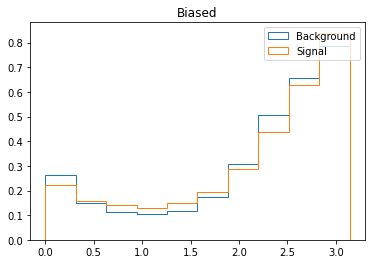

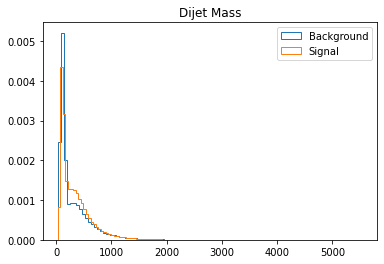

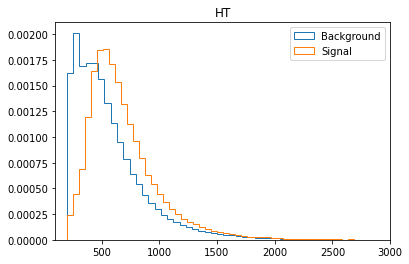

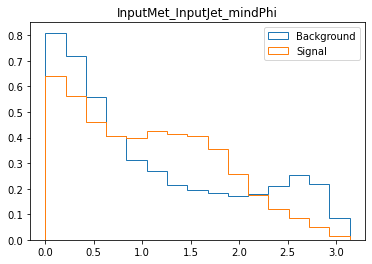

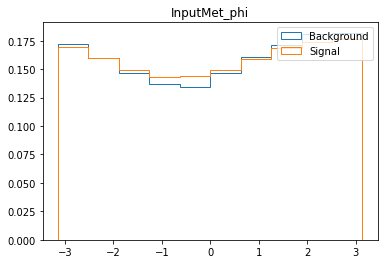

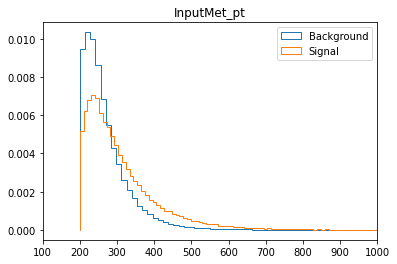

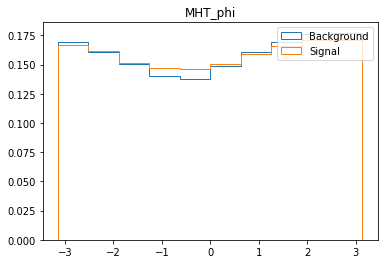

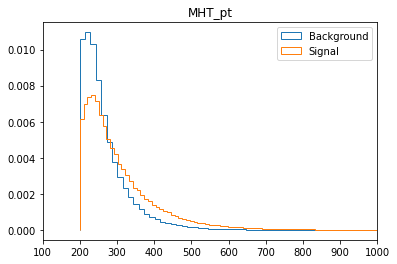

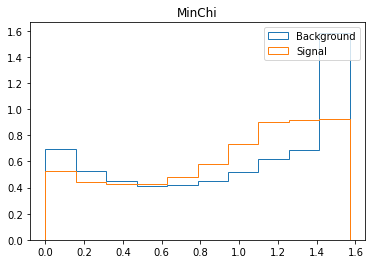

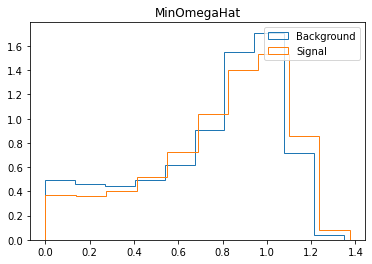

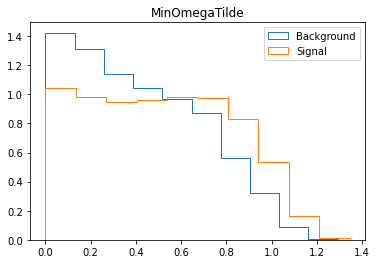

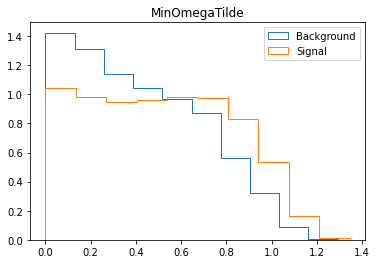

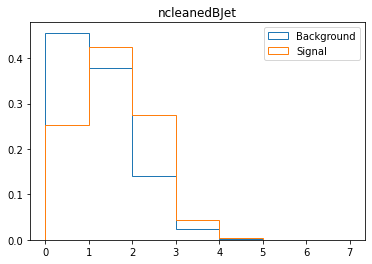

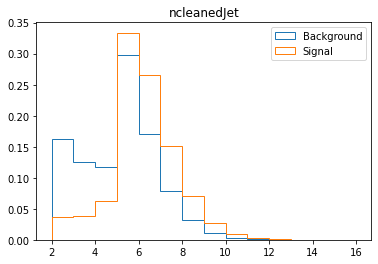

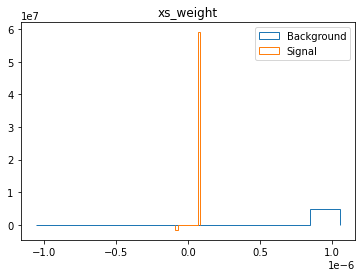

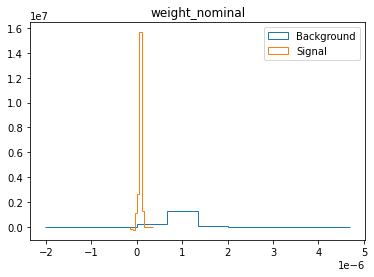

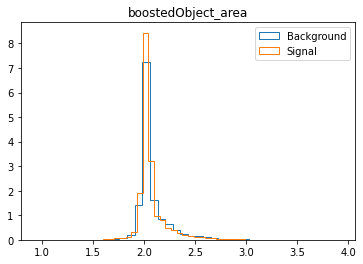

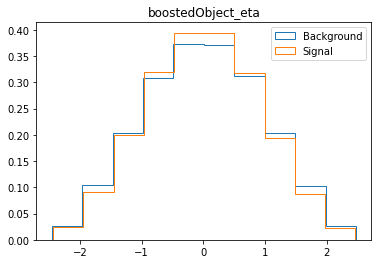

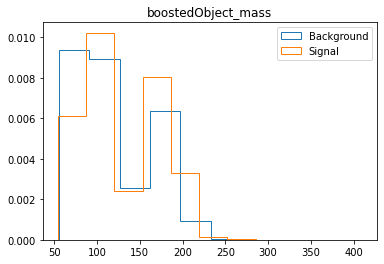

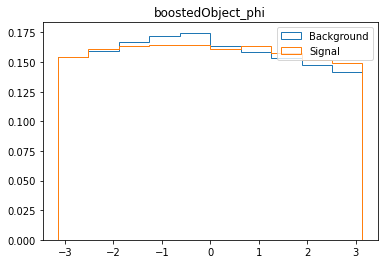

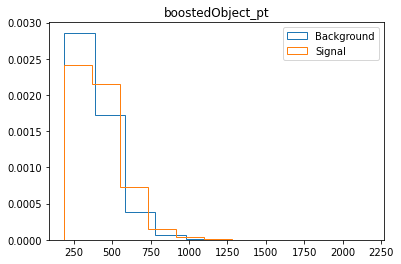

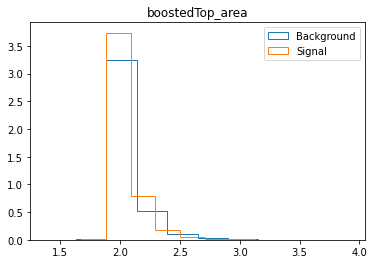

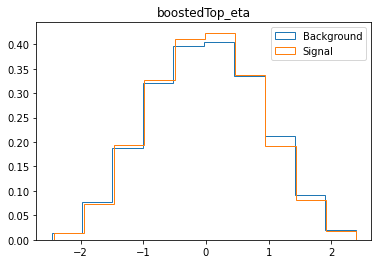

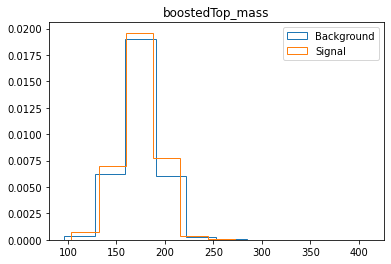

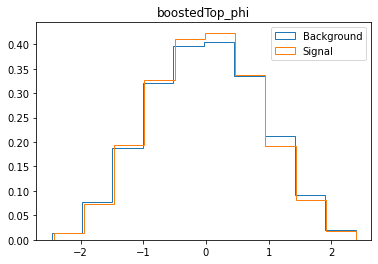

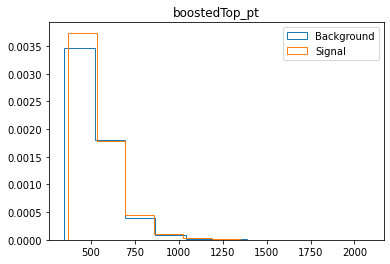

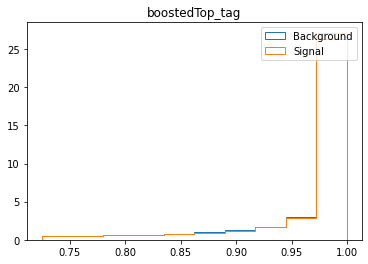

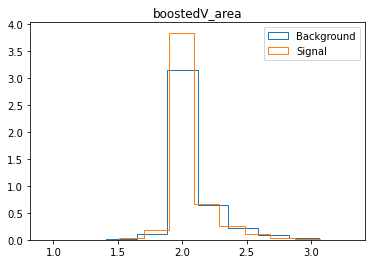

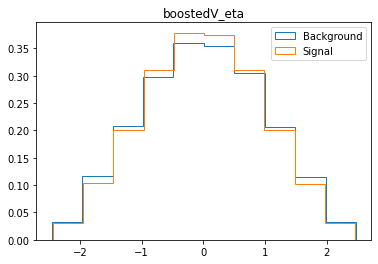

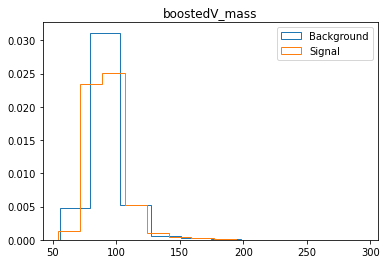

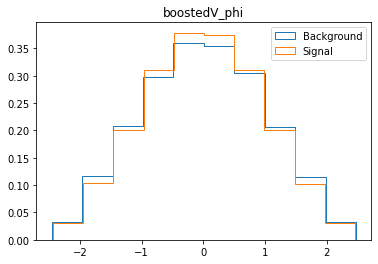

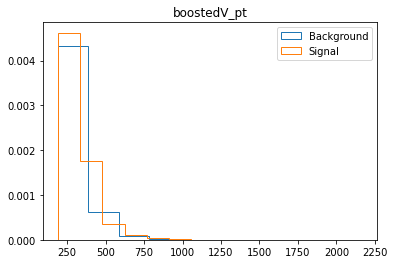

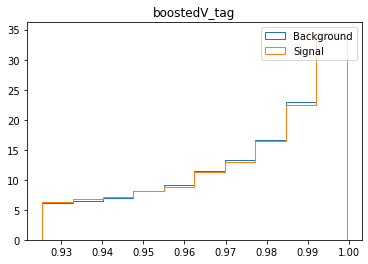

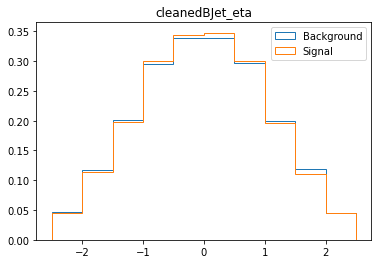

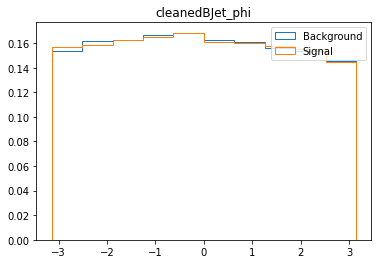

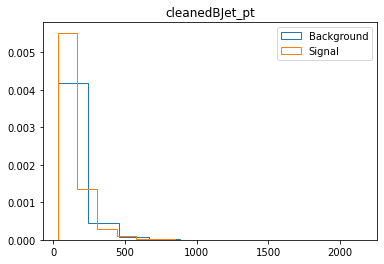

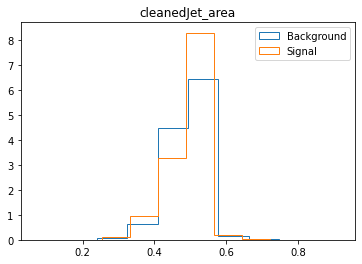

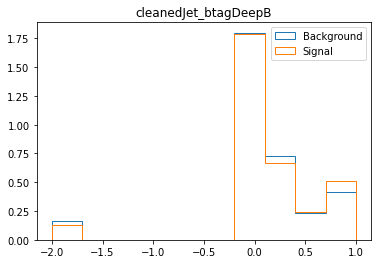

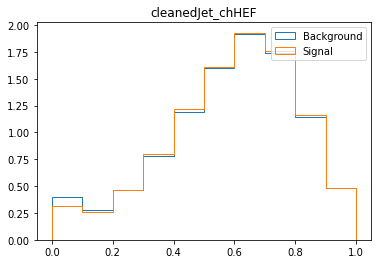

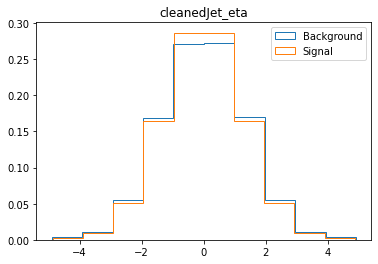

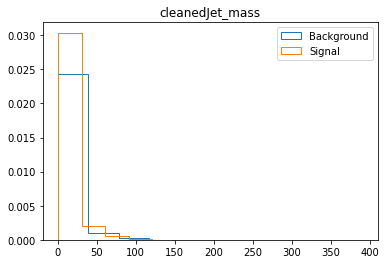

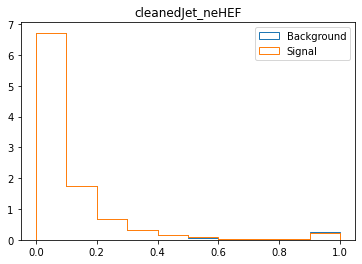

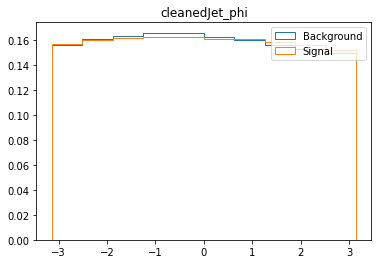

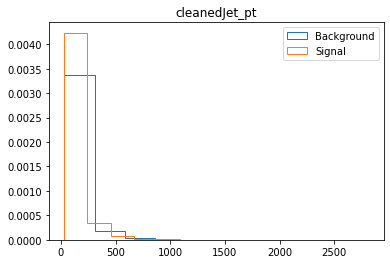

In [3]:

#%%timeit -r 1   # times how long the cell takes to run   #must be first thing in the cell
#3 mins, 40s to run

#Easy Ones (just plot with no manipulation)

#plots all normalised

#practice_features = ['ncleanedJet', 'ncleanedBJet', 'DiJet_mass', 'HT', 'InputMet_InputJet_mindPhi',
                 #   'InputMet_phi', 'InputMet_pt', 'MHT_phi', 'MHT_pt']

semi_Biased = df2['BiasedDPhi']
signal_Biased = df4['BiasedDPhi']
plt.hist(x=semi_Biased, bins = 10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_Biased, bins = 10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('Biased')
plt.legend()
plt.show()

semi_DiJet_mass = df2['DiJet_mass'] #y
signal_DiJet_mass = df4['DiJet_mass']
plt.hist(x=semi_DiJet_mass, bins =100, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_DiJet_mass, bins =100, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('Dijet Mass')
plt.legend()
#plt.xlim(0,2500)
plt.show()   #are some jets w/ like 5000 mass, anomolous

semi_HT = df2['HT']    #y
signal_HT = df4['HT']
plt.hist(x=semi_HT, bins = 100, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_HT, bins = 100, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('HT')
plt.legend()
plt.xlim(100, 3000)
plt.show()

semi_metjetphi= df2['InputMet_InputJet_mindPhi']       #y
signal_metjetphi= df4['InputMet_InputJet_mindPhi']
plt.hist(x=semi_metjetphi, bins =15, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_metjetphi, bins =15, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('InputMet_InputJet_mindPhi')
plt.legend()
plt.show()

semi_InputMet_phi= df2['InputMet_phi']          #y
signal_InputMet_phi= df4['InputMet_phi']
plt.hist(x=semi_InputMet_phi, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_InputMet_phi, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('InputMet_phi')
plt.legend()
plt.show()

semi_InputMet_pt= df2['InputMet_pt']       #y
signal_InputMet_pt= df4['InputMet_pt']
plt.hist(x=semi_InputMet_pt, bins = 150, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_InputMet_pt, bins = 150, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('InputMet_pt')
plt.legend()
plt.xlim(100,1000)
plt.show()

semi_MHT_phi= df2['MHT_phi']    #y
signal_MHT_phi= df4['MHT_phi']
plt.hist(x=semi_MHT_phi, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MHT_phi, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MHT_phi')
plt.legend()
plt.show()

semi_MHT_pt= df2['MHT_pt']      #y
signal_MHT_pt= df4['MHT_pt']
plt.hist(x=semi_MHT_pt, bins = 150 , weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MHT_pt, bins = 150 , weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MHT_pt')
plt.legend()
plt.xlim(100,1000)
plt.show() 

semi_MinChi= df2['MinChi']
signal_MinChi= df4['MinChi']
plt.hist(x=semi_MinChi, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MinChi, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MinChi')
plt.legend()
plt.show()

semi_MinOmegaHat= df2['MinOmegaHat']
signal_MinOmegaHat= df4['MinOmegaHat']
plt.hist(x=semi_MinOmegaHat, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaHat, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MinOmegaHat')
plt.legend()
plt.show()

semi_MinOmegaTilde= df2['MinOmegaTilde']
signal_MinOmegaTilde= df4['MinOmegaTilde']
plt.hist(x=semi_MinOmegaTilde, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaTilde, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MinOmegaTilde')
plt.legend()
plt.show()

semi_MinOmegaTilde= df2['MinOmegaTilde']
signal_MinOmegaTilde= df4['MinOmegaTilde']
plt.hist(x=semi_MinOmegaTilde, bins =10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaTilde, bins =10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('MinOmegaTilde')
plt.legend()
plt.show() 

semi_ncleanedBJet = df2['ncleanedBJet']   #bins need manipulating (did already)
signal_ncleanedBJet = df4['ncleanedBJet']
plt.hist(x=semi_ncleanedBJet, bins = int(np.max(df2['ncleanedBJet']) - np.min(df2['ncleanedBJet'])), weights = df2.xs_weight, density = True, histtype = 'step',  label = 'Background')
plt.hist(x=signal_ncleanedBJet, bins = int(np.max(df4['ncleanedBJet']) - np.min(df4['ncleanedBJet'])), weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('ncleanedBJet')
plt.legend()
plt.show() 

semi_ncleanedJet = df2['ncleanedJet']   #bins need manipulating (did already)
signal_ncleanedJet = df4['ncleanedJet']
plt.hist(x=semi_ncleanedJet, bins = int(np.max(df2['ncleanedJet']) - np.min(df2['ncleanedJet'])), weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_ncleanedJet, bins = int(np.max(df4['ncleanedJet']) - np.min(df4['ncleanedJet'])), weights = df4.xs_weight, density = True, histtype = 'step' , label = 'Signal')
plt.title('ncleanedJet')
plt.legend()
plt.show() 

semi_xs_weight = df2['xs_weight']   # plot to show is wrong, at least 1 -ive val (is this right?)
signal_xs_weight = df4['xs_weight'] 
plt.hist(x=semi_xs_weight, bins = 10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_xs_weight, bins = 10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('xs_weight')
plt.legend()
plt.show() 

semi_weight_nominal = df2['weight_nominal']   # plot to check seems reasonable
signal_weight_nominal = df4['weight_nominal']
plt.hist(x=semi_weight_nominal, bins = 10, weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_weight_nominal, bins = 10, weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('weight_nominal')
plt.legend()
plt.show() 

#%%timeit -r 1   # times how long the cell takes to run   #must be first thing in the cell
# takes 3min 21s to run lol

# Not so easy, i.e. data needs manipulating, look at onehot encoder etc what to do w/ missing lavues on kaggle.

# boosted jets are mostly empty, so need to work out what to do with this data

# I believe all of the below have the same issue of empty numbers in the array
 
# plotting takes ages, so would recomend copy and paste on wanted

# plots normalised

semi_boostedObject_area = df2['boostedObject_area']
semi_boostedObject_area_lst=[]
for i in semi_boostedObject_area:       
    if i.size>0:
        for j in i:
            semi_boostedObject_area_lst.append(j)
signal_boostedObject_area = df4['boostedObject_area']
signal_boostedObject_area_lst=[]
for i in signal_boostedObject_area:       
    if i.size>0:
        for j in i:
            signal_boostedObject_area_lst.append(j)
plt.hist(x=semi_boostedObject_area_lst, bins =40,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedObject_area_lst, bins =40,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedObject_area')
plt.legend()
plt.show() 


semi_boostedObject_eta = df2['boostedObject_eta']
semi_boostedObject_eta_lst=[]
for i in semi_boostedObject_eta:       
    if i.size>0:
        for j in i:
            semi_boostedObject_eta_lst.append(j)  
signal_boostedObject_eta = df4['boostedObject_eta']
signal_boostedObject_eta_lst=[]
for i in signal_boostedObject_eta:       
    if i.size>0:
        for j in i:
            signal_boostedObject_eta_lst.append(j)  
plt.hist(x=semi_boostedObject_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedObject_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedObject_eta')
plt.legend()
plt.show() 

semi_boostedObject_mass= df2['boostedObject_mass']
semi_boostedObject_mass_lst=[]
for i in semi_boostedObject_mass:       
    if i.size>0:
        for j in i:
            semi_boostedObject_mass_lst.append(j) 
signal_boostedObject_mass= df4['boostedObject_mass']
signal_boostedObject_mass_lst=[]
for i in signal_boostedObject_mass:       
    if i.size>0:
        for j in i:
            signal_boostedObject_mass_lst.append(j)
plt.hist(x=semi_boostedObject_mass_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedObject_mass_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedObject_mass')
plt.legend()
plt.show() 

semi_boostedObject_phi= df2['boostedObject_phi']
semi_boostedObject_phi_lst=[]
for i in semi_boostedObject_phi:       
    if i.size>0:
        for j in i:
            semi_boostedObject_phi_lst.append(j)
signal_boostedObject_phi= df4['boostedObject_phi']
signal_boostedObject_phi_lst=[]
for i in signal_boostedObject_phi:       
    if i.size>0:
        for j in i:
            signal_boostedObject_phi_lst.append(j)
plt.hist(x=semi_boostedObject_phi_lst , bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedObject_phi_lst , bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedObject_phi')
plt.legend()
plt.show() 

semi_boostedObject_pt= df2['boostedObject_pt']
semi_boostedObject_pt_lst=[]
for i in semi_boostedObject_pt:       
    if i.size>0:
        for j in i:
            semi_boostedObject_pt_lst.append(j)
signal_boostedObject_pt= df4['boostedObject_pt']
signal_boostedObject_pt_lst=[]
for i in signal_boostedObject_pt:       
    if i.size>0:
        for j in i:
            signal_boostedObject_pt_lst.append(j)            
plt.hist(x=semi_boostedObject_pt_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedObject_pt_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('boostedObject_pt')
plt.legend()
plt.show() 

semi_boostedTop_area= df2['boostedTop_area']
semi_boostedTop_area_lst=[]
for i in semi_boostedTop_area:       
    if i.size>0:
        for j in i:
            semi_boostedTop_area_lst.append(j)
signal_boostedTop_area= df4['boostedTop_area']
signal_boostedTop_area_lst=[]
for i in signal_boostedTop_area:       
    if i.size>0:
        for j in i:
            signal_boostedTop_area_lst.append(j)
plt.hist(x=semi_boostedTop_area_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_area_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_area')
plt.legend()
plt.show() 

semi_boostedTop_eta = df2['boostedTop_eta']
semi_boostedTop_eta_lst=[]
for i in semi_boostedTop_eta:       
    if i.size>0:
        for j in i:
            semi_boostedTop_eta_lst.append(j)
signal_boostedTop_eta = df4['boostedTop_eta']
signal_boostedTop_eta_lst=[]
for i in signal_boostedTop_eta:       
    if i.size>0:
        for j in i:
            signal_boostedTop_eta_lst.append(j)
plt.hist(x=semi_boostedTop_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_eta')
plt.legend()
plt.show()

semi_boostedTop_mass = df2['boostedTop_mass']
semi_boostedTop_mass_lst=[]
for i in semi_boostedTop_mass:       
    if i.size>0:
        for j in i:
            semi_boostedTop_mass_lst.append(j)
signal_boostedTop_mass = df4['boostedTop_mass']
signal_boostedTop_mass_lst=[]
for i in signal_boostedTop_mass:       
    if i.size>0:
        for j in i:
            signal_boostedTop_mass_lst.append(j)
plt.hist(x=semi_boostedTop_mass_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_mass_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_mass')
plt.legend()
plt.show()

semi_boostedTop_phi = df2['boostedTop_phi']
semi_boostedTop_phi_lst=[]
for i in semi_boostedTop_phi:       
    if i.size>0:
        for j in i:
            semi_boostedTop_phi_lst.append(j)
signal_boostedTop_phi = df4['boostedTop_phi']
signal_boostedTop_phi_lst=[]
for i in signal_boostedTop_phi:       
    if i.size>0:
        for j in i:
            signal_boostedTop_phi_lst.append(j)
plt.hist(x=semi_boostedTop_phi_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_phi_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_phi')
plt.legend()
plt.show()

semi_boostedTop_pt = df2['boostedTop_pt']
semi_boostedTop_pt_lst=[]
for i in semi_boostedTop_pt:       
    if i.size>0:
        for j in i:
            semi_boostedTop_pt_lst.append(j)
signal_boostedTop_pt = df4['boostedTop_pt']
signal_boostedTop_pt_lst=[]
for i in signal_boostedTop_pt:       
    if i.size>0:
        for j in i:
            signal_boostedTop_pt_lst.append(j)
plt.hist(x=semi_boostedTop_pt_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_pt_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_pt')
plt.legend()
plt.show()

semi_boostedTop_tag = df2['boostedTop_tag']
semi_boostedTop_tag_lst=[]
for i in semi_boostedTop_tag:       
    if i.size>0:
        for j in i:
            semi_boostedTop_tag_lst.append(j)
signal_boostedTop_tag = df4['boostedTop_tag']
signal_boostedTop_tag_lst=[]
for i in signal_boostedTop_tag:       
    if i.size>0:
        for j in i:
            signal_boostedTop_tag_lst.append(j)
plt.hist(x=semi_boostedTop_tag_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedTop_tag_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedTop_tag')
plt.legend()
plt.show()

semi_boostedV_area = df2['boostedV_area']
semi_boostedV_area_lst=[]
for i in semi_boostedV_area:       
    if i.size>0:
        for j in i:
            semi_boostedV_area_lst.append(j)
signal_boostedV_area = df4['boostedV_area']
signal_boostedV_area_lst=[]
for i in signal_boostedV_area:       
    if i.size>0:
        for j in i:
            signal_boostedV_area_lst.append(j)
plt.hist(x=semi_boostedV_area_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_area_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_area')
plt.legend()
plt.show()

semi_boostedV_eta = df2['boostedV_eta']
semi_boostedV_eta_lst=[]
for i in semi_boostedV_eta:       
    if i.size>0:
        for j in i:
            semi_boostedV_eta_lst.append(j)
signal_boostedV_eta = df4['boostedV_eta']
signal_boostedV_eta_lst=[]
for i in signal_boostedV_eta:       
    if i.size>0:
        for j in i:
            signal_boostedV_eta_lst.append(j)
plt.hist(x=semi_boostedV_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_eta_lst, bins =10,  density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_eta')
plt.legend()
plt.show()

semi_boostedV_mass= df2['boostedV_mass']
semi_boostedV_mass_lst=[]
for i in semi_boostedV_mass:       
    if i.size>0:
        for j in i:
            semi_boostedV_mass_lst.append(j)
signal_boostedV_mass= df4['boostedV_mass']
signal_boostedV_mass_lst=[]
for i in signal_boostedV_mass:       
    if i.size>0:
        for j in i:
            signal_boostedV_mass_lst.append(j)
plt.hist(x=semi_boostedV_mass_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_mass_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_mass')
plt.legend()
plt.show() 

semi_boostedV_phi = df2['boostedV_phi']
semi_boostedV_phi_lst=[]
for i in semi_boostedV_phi:       
    if i.size>0:
        for j in i:
            semi_boostedV_phi_lst.append(j)
signal_boostedV_phi = df4['boostedV_phi']
signal_boostedV_phi_lst=[]
for i in signal_boostedV_phi:       
    if i.size>0:
        for j in i:
            signal_boostedV_phi_lst.append(j)
plt.hist(x=semi_boostedV_phi_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_phi_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_phi')
plt.legend()
plt.show() 

semi_boostedV_pt = df2['boostedV_pt']
semi_boostedV_pt_lst=[]
for i in semi_boostedV_pt:       
    if i.size>0:
        for j in i:
            semi_boostedV_pt_lst.append(j)
signal_boostedV_pt = df4['boostedV_pt']
signal_boostedV_pt_lst=[]
for i in signal_boostedV_pt:       
    if i.size>0:
        for j in i:
            signal_boostedV_pt_lst.append(j)
plt.hist(x=semi_boostedV_pt_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_pt_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_pt')
plt.legend()
plt.show() 

semi_boostedV_tag = df2['boostedV_tag']
semi_boostedV_tag_lst=[]
for i in semi_boostedV_tag:       
    if i.size>0:
        for j in i:
            semi_boostedV_tag_lst.append(j)
signal_boostedV_tag = df4['boostedV_tag']
signal_boostedV_tag_lst=[]
for i in signal_boostedV_tag:       
    if i.size>0:
        for j in i:
            signal_boostedV_tag_lst.append(j)
plt.hist(x=semi_boostedV_tag_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_boostedV_tag_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('boostedV_tag')
plt.legend()
plt.show() 

semi_cleanedBJet_eta= df2['cleanedBJet_eta']
semi_cleanedBJet_eta_lst=[]
for i in semi_cleanedBJet_eta:       
    if i.size>0:
        for j in i:
            semi_cleanedBJet_eta_lst.append(j)
signal_cleanedBJet_eta= df4['cleanedBJet_eta']
signal_cleanedBJet_eta_lst=[]
for i in signal_cleanedBJet_eta:       
    if i.size>0:
        for j in i:
            signal_cleanedBJet_eta_lst.append(j)
plt.hist(x=semi_cleanedBJet_eta_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedBJet_eta_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedBJet_eta')
plt.legend()
plt.show() 

semi_cleanedBJet_phi = df2['cleanedBJet_phi']
semi_cleanedBJet_phi_lst=[]
for i in semi_cleanedBJet_phi:       
    if i.size>0:
        for j in i:
            semi_cleanedBJet_phi_lst.append(j)
signal_cleanedBJet_phi = df4['cleanedBJet_phi']
signal_cleanedBJet_phi_lst=[]
for i in signal_cleanedBJet_phi:       
    if i.size>0:
        for j in i:
            signal_cleanedBJet_phi_lst.append(j)
plt.hist(x=semi_cleanedBJet_phi_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedBJet_phi_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedBJet_phi')
plt.legend()
plt.show() 

semi_cleanedBJet_pt = df2['cleanedBJet_pt']
semi_cleanedBJet_pt_lst=[]
for i in semi_cleanedBJet_pt:       
    if i.size>0:
        for j in i:
            semi_cleanedBJet_pt_lst.append(j)
signal_cleanedBJet_pt = df4['cleanedBJet_pt']
signal_cleanedBJet_pt_lst=[]
for i in signal_cleanedBJet_pt:       
    if i.size>0:
        for j in i:
            signal_cleanedBJet_pt_lst.append(j)
plt.hist(x=semi_cleanedBJet_pt_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedBJet_pt_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedBJet_pt')
plt.legend()
plt.show()

semi_cleanedJet_area = df2['cleanedJet_area']
semi_cleanedJet_area_lst=[]
for i in semi_cleanedJet_area:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_area_lst.append(j)
signal_cleanedJet_area = df4['cleanedJet_area']
signal_cleanedJet_area_lst=[]
for i in signal_cleanedJet_area:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_area_lst.append(j)
plt.hist(x=semi_cleanedJet_area_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_area_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_area')
plt.legend()
plt.show() 

semi_cleanedJet_btagDeepB = df2['cleanedJet_btagDeepB']
semi_cleanedJet_btagDeepB_lst=[]
for i in semi_cleanedJet_btagDeepB:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_btagDeepB_lst.append(j)
signal_cleanedJet_btagDeepB = df4['cleanedJet_btagDeepB']
signal_cleanedJet_btagDeepB_lst=[]
for i in signal_cleanedJet_btagDeepB:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_btagDeepB_lst.append(j)
plt.hist(x=semi_cleanedJet_btagDeepB_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_btagDeepB_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_btagDeepB')
plt.legend()
plt.show() 


semi_cleanedJet_chHEF = df2['cleanedJet_chHEF']
semi_cleanedJet_chHEF_lst=[]
for i in semi_cleanedJet_chHEF:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_chHEF_lst.append(j)
signal_cleanedJet_chHEF = df4['cleanedJet_chHEF']
signal_cleanedJet_chHEF_lst=[]
for i in signal_cleanedJet_chHEF:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_chHEF_lst.append(j)
plt.hist(x=semi_cleanedJet_chHEF_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_chHEF_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_chHEF')
plt.legend()
plt.show() 

semi_cleanedJet_eta = df2['cleanedJet_eta']
semi_cleanedJet_eta_lst=[]
for i in semi_cleanedJet_eta:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_eta_lst.append(j)
signal_cleanedJet_eta = df4['cleanedJet_eta']
signal_cleanedJet_eta_lst=[]
for i in signal_cleanedJet_eta:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_eta_lst.append(j)
plt.hist(x=semi_cleanedJet_eta_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_eta_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_eta')
plt.legend()
plt.show() 

semi_cleanedJet_mass = df2['cleanedJet_mass']
semi_cleanedJet_mass_lst=[]
for i in semi_cleanedJet_mass:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_mass_lst.append(j)
signal_cleanedJet_mass = df4['cleanedJet_mass']
signal_cleanedJet_mass_lst=[]
for i in signal_cleanedJet_mass:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_mass_lst.append(j)
plt.hist(x=semi_cleanedJet_mass_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_mass_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_mass')
plt.legend()
plt.show() 

semi_cleanedJet_neHEF = df2['cleanedJet_neHEF']
semi_cleanedJet_neHEF_lst=[]
for i in semi_cleanedJet_neHEF:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_neHEF_lst.append(j)
signal_cleanedJet_neHEF = df4['cleanedJet_neHEF']
signal_cleanedJet_neHEF_lst=[]
for i in signal_cleanedJet_neHEF:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_neHEF_lst.append(j)
plt.hist(x=semi_cleanedJet_neHEF_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_neHEF_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_neHEF')
plt.legend()
plt.show() 

semi_cleanedJet_phi = df2['cleanedJet_phi']
semi_cleanedJet_phi_lst=[]
for i in semi_cleanedJet_phi:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_phi_lst.append(j)
signal_cleanedJet_phi = df4['cleanedJet_phi']
signal_cleanedJet_phi_lst=[]
for i in signal_cleanedJet_phi:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_phi_lst.append(j)
plt.hist(x=semi_cleanedJet_phi_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_phi_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_phi')
plt.legend()
plt.show() 

semi_cleanedJet_pt = df2['cleanedJet_pt']
semi_cleanedJet_pt_lst=[]
for i in semi_cleanedJet_pt:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_pt_lst.append(j)
signal_cleanedJet_pt = df4['cleanedJet_pt']
signal_cleanedJet_pt_lst=[]
for i in signal_cleanedJet_pt:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_pt_lst.append(j)
plt.hist(x=semi_cleanedJet_pt_lst, bins =10, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_pt_lst, bins =10, density = True, histtype = 'step', label = 'Signal')
plt.title('cleanedJet_pt')
plt.legend()
plt.show() 

## Plot graphs with cross section weighting (ones w/ log scale are relevant)

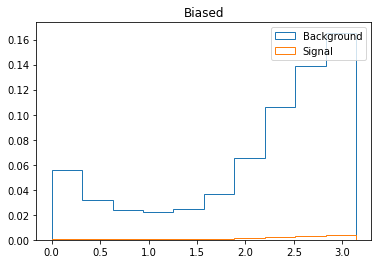

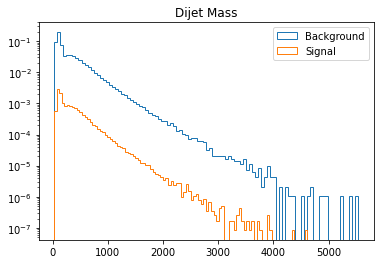

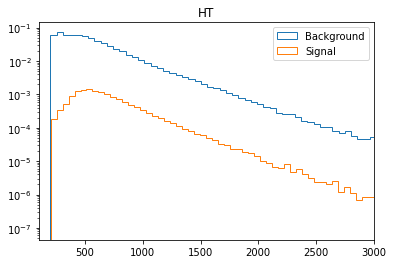

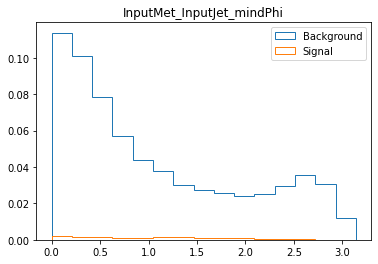

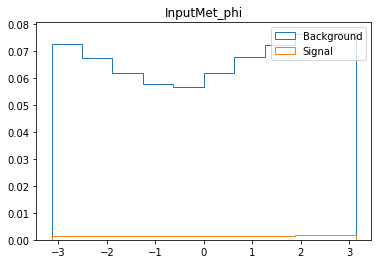

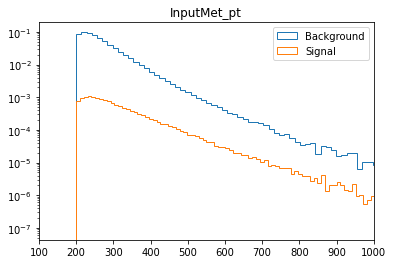

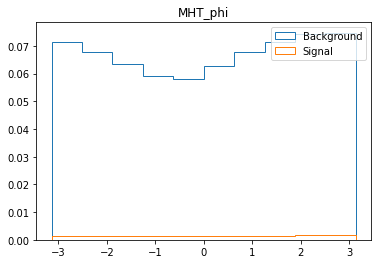

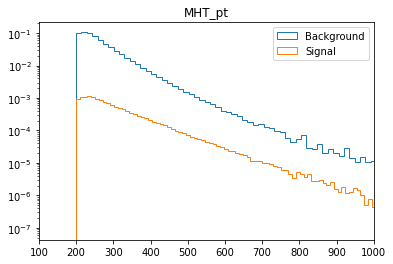

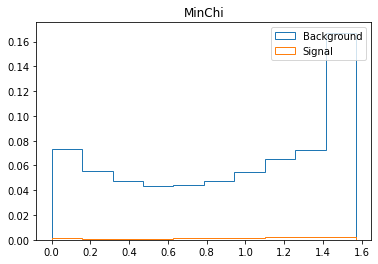

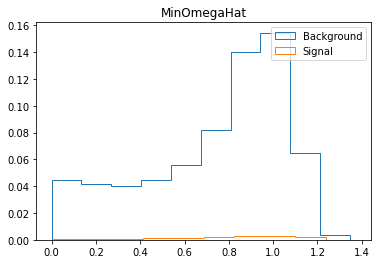

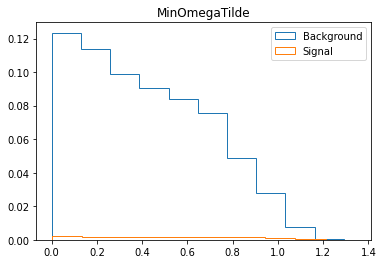

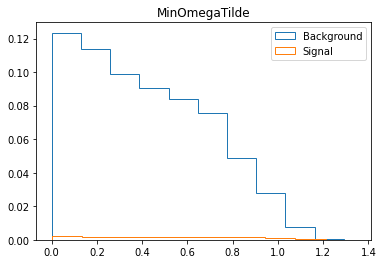

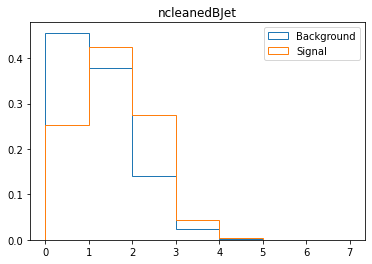

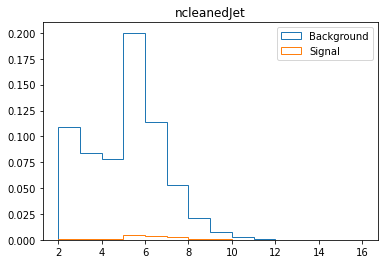

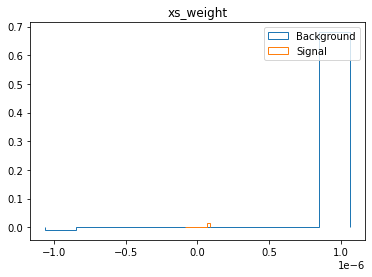

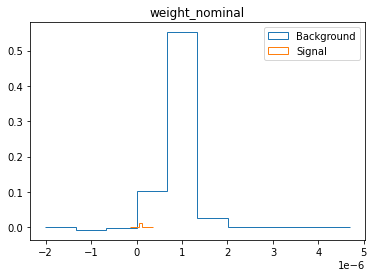

In [6]:
#%%timeit -r 1   # times how long the cell takes to run   #must be first thing in the cell
#4s to run

#Easy Ones (just plot with no manipulation)

#plots all weighted

semi_Biased = df2['BiasedDPhi']
signal_Biased = df4['BiasedDPhi']
plt.hist(x=semi_Biased, bins = 10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_Biased, bins = 10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('Biased')
plt.legend()
plt.show()

semi_DiJet_mass = df2['DiJet_mass']
signal_DiJet_mass = df4['DiJet_mass']
plt.hist(x=semi_DiJet_mass, bins =100, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_DiJet_mass, bins =100, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('Dijet Mass')
plt.yscale('log')
plt.legend()
#plt.xlim(0,2500)
plt.show()   #are some jets w/ like 5000 mass, anomolous

semi_HT = df2['HT']
signal_HT = df4['HT']
plt.hist(x=semi_HT, bins = 100, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_HT, bins = 100, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.yscale('log')
plt.title('HT')
plt.legend()
plt.xlim(100, 3000)
plt.show()

semi_metjetphi= df2['InputMet_InputJet_mindPhi']
signal_metjetphi= df4['InputMet_InputJet_mindPhi']
plt.hist(x=semi_metjetphi, bins =15, weights = df2.xs_weight, histtype = 'step', label = 'Background')
plt.hist(x=signal_metjetphi, bins =15, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('InputMet_InputJet_mindPhi')
plt.legend()
plt.show()

semi_InputMet_phi= df2['InputMet_phi']
signal_InputMet_phi= df4['InputMet_phi']
plt.hist(x=semi_InputMet_phi, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_InputMet_phi, bins =10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('InputMet_phi')
plt.legend()
plt.show()

semi_InputMet_pt= df2['InputMet_pt']
signal_InputMet_pt= df4['InputMet_pt']
plt.hist(x=semi_InputMet_pt, bins = 150, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_InputMet_pt, bins = 150, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('InputMet_pt')
plt.yscale('log')
plt.legend()
plt.xlim(100,1000)
plt.show()

semi_MHT_phi= df2['MHT_phi']
signal_MHT_phi= df4['MHT_phi']
plt.hist(x=semi_MHT_phi, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MHT_phi, bins =10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('MHT_phi')
plt.legend()
plt.show()

semi_MHT_pt= df2['MHT_pt']
signal_MHT_pt= df4['MHT_pt']
plt.hist(x=semi_MHT_pt, bins = 150 , weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MHT_pt, bins = 150 , weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('MHT_pt')
plt.yscale('log')
plt.legend()
plt.xlim(100,1000)
plt.show() 

semi_MinChi= df2['MinChi']
signal_MinChi= df4['MinChi']
plt.hist(x=semi_MinChi, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MinChi, bins =10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('MinChi')
plt.legend()
plt.show()

semi_MinOmegaHat= df2['MinOmegaHat']
signal_MinOmegaHat= df4['MinOmegaHat']
plt.hist(x=semi_MinOmegaHat, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaHat, bins =10, weights = df4.xs_weight, histtype = 'step', label = 'Signal')
plt.title('MinOmegaHat')
plt.legend()
plt.show()

semi_MinOmegaTilde= df2['MinOmegaTilde']
signal_MinOmegaTilde= df4['MinOmegaTilde']
plt.hist(x=semi_MinOmegaTilde, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaTilde, bins =10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('MinOmegaTilde')
plt.legend()
plt.show()

semi_MinOmegaTilde= df2['MinOmegaTilde']
signal_MinOmegaTilde= df4['MinOmegaTilde']
plt.hist(x=semi_MinOmegaTilde, bins =10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_MinOmegaTilde, bins =10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('MinOmegaTilde')
plt.legend()
plt.show() 

semi_ncleanedBJet = df2['ncleanedBJet']   #bins need manipulating (did already)
signal_ncleanedBJet = df4['ncleanedBJet']
plt.hist(x=semi_ncleanedBJet, bins = int(np.max(df2['ncleanedBJet']) - np.min(df2['ncleanedBJet'])), weights = df2.xs_weight, density = True, histtype = 'step',  label = 'Background')
plt.hist(x=signal_ncleanedBJet, bins = int(np.max(df4['ncleanedBJet']) - np.min(df4['ncleanedBJet'])), weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('ncleanedBJet')
plt.legend()
plt.show() 

semi_ncleanedJet = df2['ncleanedJet']   #bins need manipulating (did already)
signal_ncleanedJet = df4['ncleanedJet']
plt.hist(x=semi_ncleanedJet, bins = int(np.max(df2['ncleanedJet']) - np.min(df2['ncleanedJet'])), weights = df2.xs_weight, histtype = 'step', label = 'Background')
plt.hist(x=signal_ncleanedJet, bins = int(np.max(df4['ncleanedJet']) - np.min(df4['ncleanedJet'])), weights = df4.xs_weight,  histtype = 'step' , label = 'Signal')
plt.title('ncleanedJet')
plt.legend()
plt.show() 

semi_xs_weight = df2['xs_weight']   # plot to show is wrong, at least 1 -ive val (is this right?)
signal_xs_weight = df4['xs_weight'] 
plt.hist(x=semi_xs_weight, bins = 10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_xs_weight, bins = 10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('xs_weight')
plt.legend()
plt.show() 

semi_weight_nominal = df2['weight_nominal']   # plot to check seems reasonable
signal_weight_nominal = df4['weight_nominal']
plt.hist(x=semi_weight_nominal, bins = 10, weights = df2.xs_weight,  histtype = 'step', label = 'Background')
plt.hist(x=signal_weight_nominal, bins = 10, weights = df4.xs_weight,  histtype = 'step', label = 'Signal')
plt.title('weight_nominal')
plt.legend()
plt.show() 

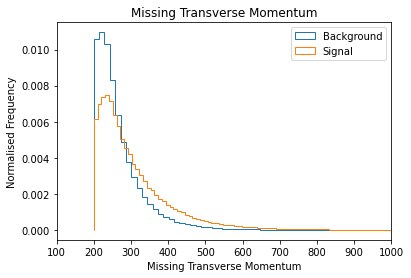

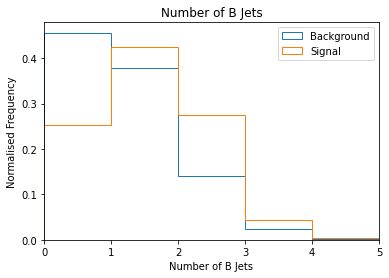

In [4]:
semi_MHT_pt= df2['MHT_pt']
signal_MHT_pt= df4['MHT_pt']
plt.hist(x=semi_MHT_pt, bins = 150 , weights = df2.xs_weight, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_MHT_pt, bins = 150 , weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('Missing Transverse Momentum')
plt.legend()
plt.xlim(100,1000)
plt.xlabel('Missing Transverse Momentum')
plt.ylabel('Normalised Frequency')
plt.show() 

semi_ncleanedBJet = df2['ncleanedBJet']   #bins need manipulating (did already)
signal_ncleanedBJet = df4['ncleanedBJet']
plt.hist(x=semi_ncleanedBJet, bins = int(np.max(df2['ncleanedBJet']) - np.min(df2['ncleanedBJet'])), weights = df2.xs_weight, density = True, histtype = 'step',  label = 'Background')
plt.hist(x=signal_ncleanedBJet, bins = int(np.max(df4['ncleanedBJet']) - np.min(df4['ncleanedBJet'])), weights = df4.xs_weight, density = True, histtype = 'step', label = 'Signal')
plt.title('Number of B Jets')
plt.xlim(0,5)
plt.ylabel('Normalised Frequency')
plt.xlabel('Number of B Jets')
plt.legend()
plt.show() 

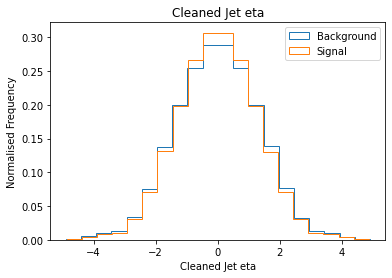

In [5]:
semi_cleanedJet_eta = df2['cleanedJet_eta']
semi_cleanedJet_eta_lst=[]
for i in semi_cleanedJet_eta:       
    if i.size>0:
        for j in i:
            semi_cleanedJet_eta_lst.append(j)
signal_cleanedJet_eta = df4['cleanedJet_eta']
signal_cleanedJet_eta_lst=[]
for i in signal_cleanedJet_eta:       
    if i.size>0:
        for j in i:
            signal_cleanedJet_eta_lst.append(j)
plt.hist(x=semi_cleanedJet_eta_lst, bins =20, density = True, histtype = 'step', label = 'Background')
plt.hist(x=signal_cleanedJet_eta_lst, bins =20, density = True, histtype = 'step', label = 'Signal')
plt.title('Cleaned Jet eta')
plt.xlabel('Cleaned Jet eta')
plt.ylabel('Normalised Frequency')
plt.legend()
plt.show() 